In [1]:
def circles_input(num_circle):
    #To enter coordinates and radius manually
    
    list_circle=[]
    
    for i in range(num_circle):
        cid ='c'+str(i+1)
        coordinates=eval(input('Enter coordinates: '))
        radius=eval(input('Enter radius: '))
        list_circle.append([cid,coordinates,radius])
    
    return list_circle

In [2]:
def read_data_through_csv():
    import csv
    
    with open('circle_data.csv', 'r') as f:
        reader = csv.reader(f)
        list_circle = []
        
        for lines in reader:
            cid = lines[0]
            coordinates = (eval(lines[1]), eval(lines[2]))
            radius = eval(lines[3])
            list_circle.append([cid, coordinates, radius])
    
    print(list_circle)
    return list_circle

In [3]:
def circles_info(list_circle):
    print('\n\n'+'*'*100)
    
    for circle in list_circle:
        print('\n\nthe circle {} has coordinates {} and radius {}'
          .format(circle[0],circle[1],circle[2]))

In [4]:
def intersections(list_circle):
    # To check intersecting circle groups
    # List gives each circle and other circles it is intersecting with in a list
    # Collecting all of them in a list

    from math import dist
    
    groups = []
    
    for circle in list_circle:  
        group=[]
        group.append(circle[0])
        
        for othercircle in list_circle:
            if circle != othercircle:          
                #To check center distance between two circles and sum of radius of circles
                #If sum of radius>=center distance, they are intersecting or tangential
                
                center_dist = dist(circle[1],othercircle[1])
                radius_sum =  circle[2] + othercircle[2]
                if radius_sum>=center_dist:
                    group.append(othercircle[0])
                    
        groups.append(group)

    print('*'*100+'\n\n')
    print('intersecting groups are\n\n',groups)
    return groups

In [5]:
def find_clusters(groups):
    #To find the cluster of circles, iterate through the individual groups against the other and if common circle 
    #found in those groups, they are to be merged until there will be no common circles between groups. 
    
    for group in groups:
        for match in groups:
            if any(x in group for x in match) and group != match:
                group.extend([x for x in match if x not in group])
                match.clear()
    
    clusters=[x for x in groups if x!=[]]
    print('*'*100+'\n\n')
    print('clusters are\n\n',clusters)
    print('*'*100+'\n\n')
    return clusters

In [6]:
def plot_circles(list_circle):
    #Plot the circles using coordinates and radius to verify the results 
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12,12))
    plt.axis('off')
    ax = fig.add_subplot(111)

    for circle in list_circle:
        id=circle[0]
        circles=plt.Circle(circle[1], radius=circle[2],facecolor='None',
                       edgecolor='b')
        label = ax.annotate(id, xy=(circle[1]), fontsize=15,ha="center")
        ax.add_patch(circles)
       
    ax.set_aspect('equal')
    ax.autoscale_view()
    plt.show()

In [7]:
def intersection_info(groups):
    #to print the intersecting members of each circle.
    
    for igroup in groups:
        print('\n', igroup[0], 'is intersecting with: ', end='')
        if len(igroup) == 1:
            print('None', end='')
        for i in range(1, len(igroup)):
            print(igroup[i], end=' ')

    print()
    #To print circle with maximum intersections and its members
    max_intersection = len(max(groups,key=len))
    max_int_circle = [x[0] for x in groups if len(x) == max_intersection]
    print('*'*100)
    print('circle/s with maximum intersection is/are {} with {} intersections' .format(' '.join(max_int_circle), max_intersection - 1))


In [8]:
def cluster_info(clusters):
    #To print cluster with maximum number of circles
    
    max_len_cluster = len(max(clusters, key=len))
    print('*'*100)
    print('largest cluster/s with', max_len_cluster, 'circles')
    print('circles in largest cluster/s are: ')
    
    for cluster in clusters:
        if len(cluster) == max_len_cluster:
            print('cluster: ', ' '.join(cluster))

    print('*' * 100)

[['c1', (2, 5), 1], ['c2', (18, 6), 2], ['c3', (15, 3), 3], ['c4', (8, 18), 4], ['c5', (6, 0), 1], ['c6', (0, 0), 2], ['c7', (9, 12), 1], ['c8', (21, 15), 3], ['c9', (24, 3), 5], ['c10', (0, 22), 4], ['c11', (0, 16), 2.5], ['c12', (8, 8), 1.2], ['c14', (11, 16), 2.1], ['c15', (22, 6), 1.7], ['c16', (4, 14), 0.5], ['c17', (20, 5), 0.2], ['c18', (25, 25), 2], ['c19', (12, 24), 4.1], ['c20', (24, 1), 1.1]]


****************************************************************************************************


the circle c1 has coordinates (2, 5) and radius 1


the circle c2 has coordinates (18, 6) and radius 2


the circle c3 has coordinates (15, 3) and radius 3


the circle c4 has coordinates (8, 18) and radius 4


the circle c5 has coordinates (6, 0) and radius 1


the circle c6 has coordinates (0, 0) and radius 2


the circle c7 has coordinates (9, 12) and radius 1


the circle c8 has coordinates (21, 15) and radius 3


the circle c9 has coordinates (24, 3) and radius 5


the circle c1

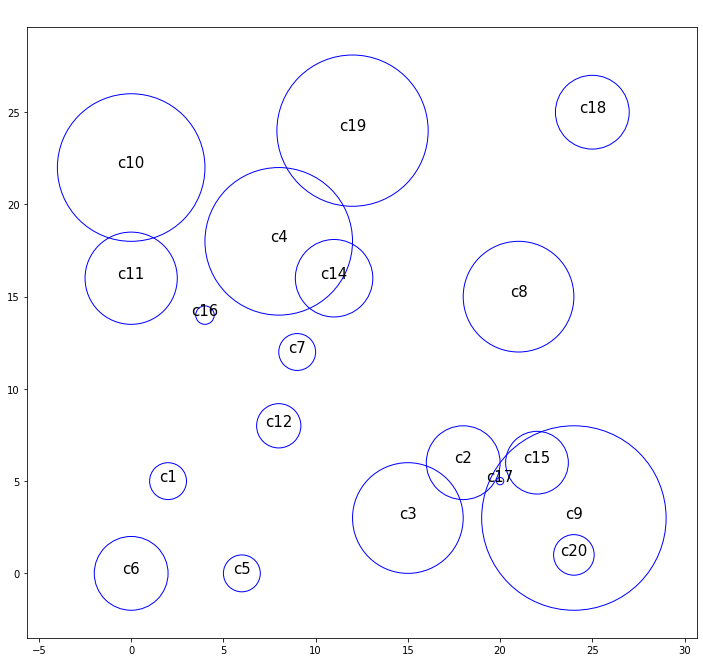

In [10]:
#num_circle=int(input('Enter number of circles: '))
#list_circle=circles_input(num_circle)
list_circle = read_data_through_csv()
circles_info(list_circle)
groups=intersections(list_circle)
intersection_info(groups)
clusters=find_clusters(groups)
cluster_info(clusters)
plot_circles(list_circle)